<a href="https://colab.research.google.com/github/Faara34/TelecomChurnMl/blob/main/CwMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [981]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [982]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [983]:
df = pd.read_csv('/content/drive/MyDrive/ML_CW_Sem01/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [984]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [985]:
df.shape




(7043, 21)

In [986]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [987]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [988]:
#checking datatypes and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [989]:
#noticed that totalcharges is considered as an object therefore coverted to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [990]:
#checking the churn distribution
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [991]:
#convering the yes and or for numeric to plot
#convering 0 and 1 for yes and no
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


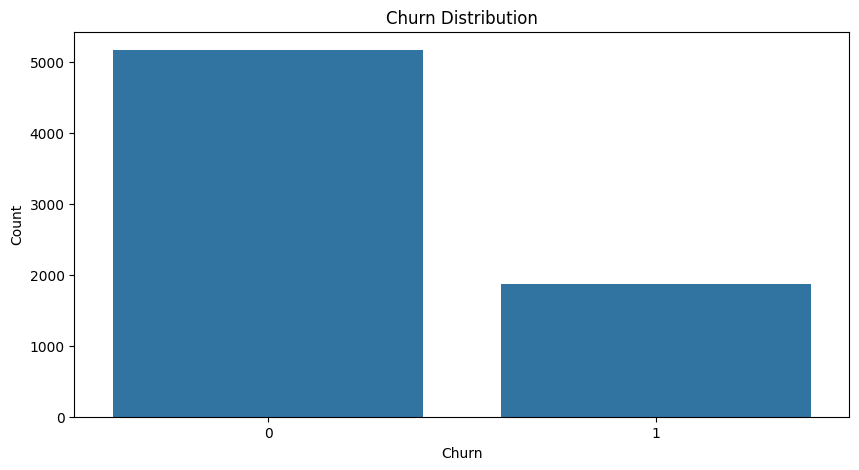

In [992]:
#churn distribution plot
plt.figure(figsize=(10,5))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [993]:
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [994]:
#seeing the numerical colomns
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [995]:
target = 'Churn' #removing 'Churn'
if target in num_cols:
    num_cols.remove(target)


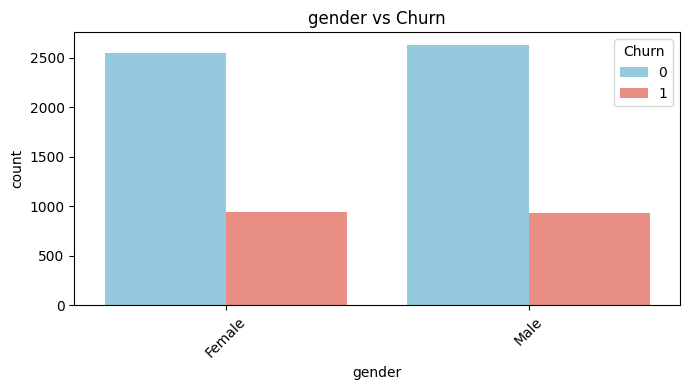

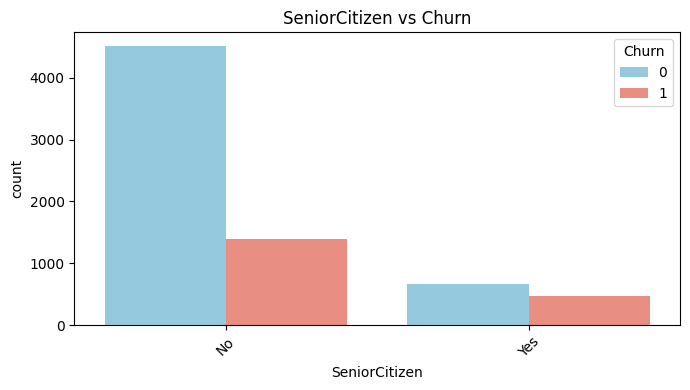

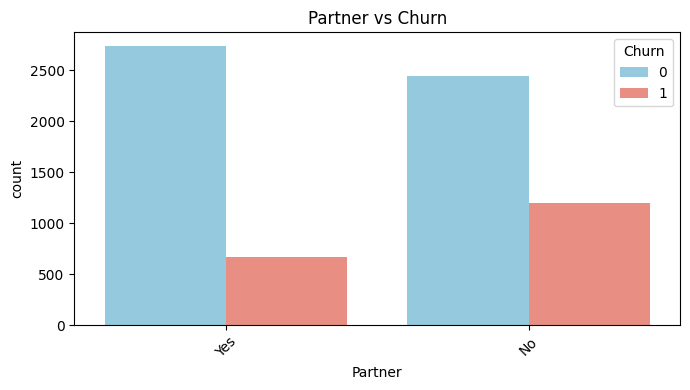

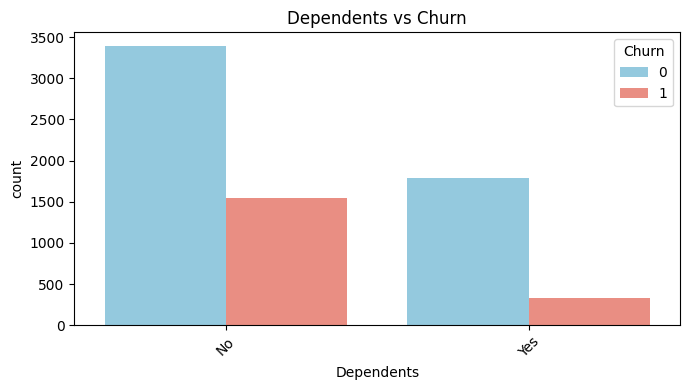

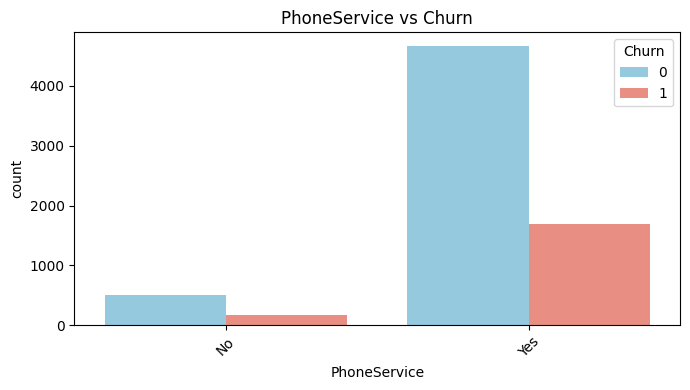

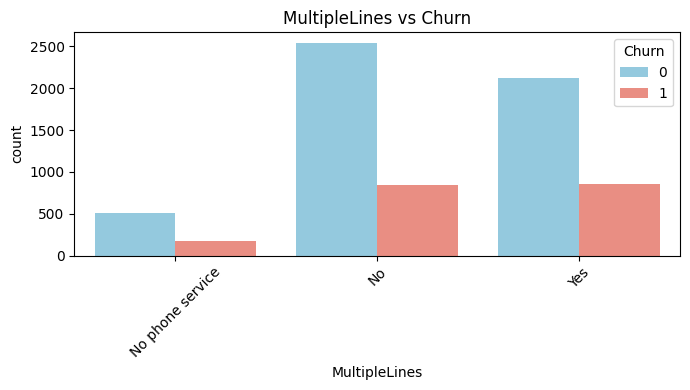

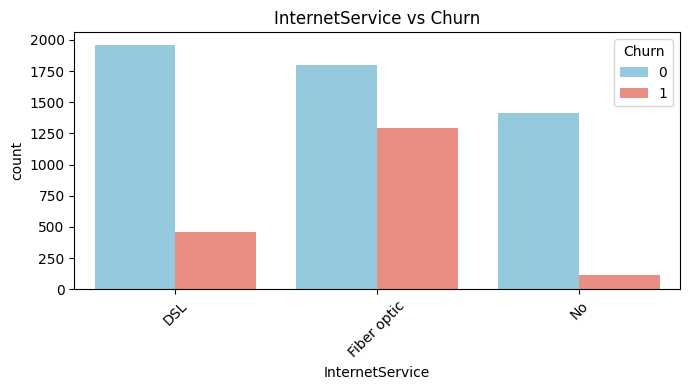

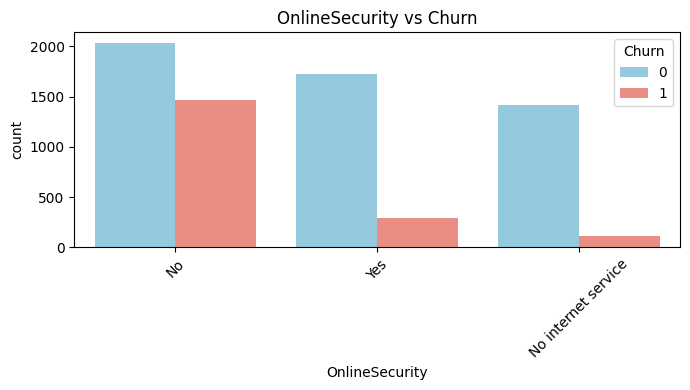

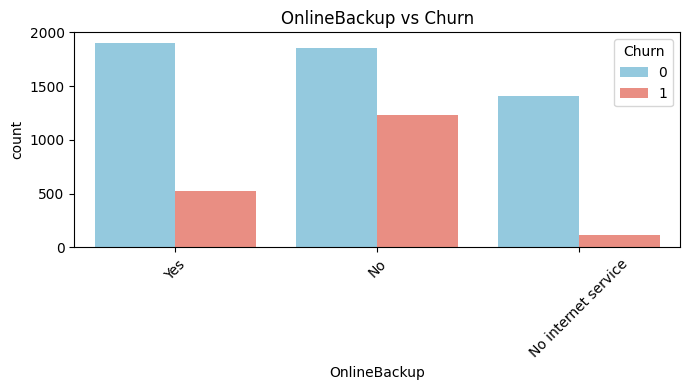

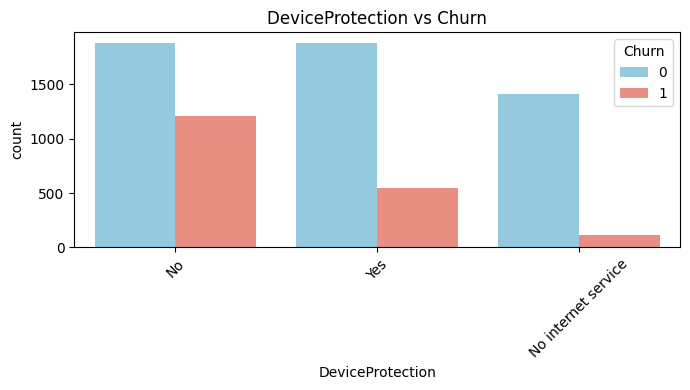

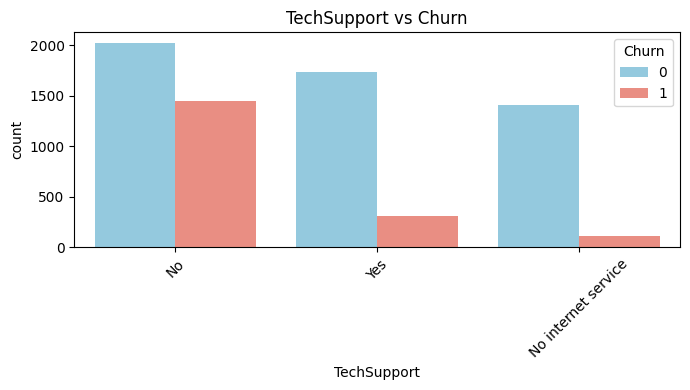

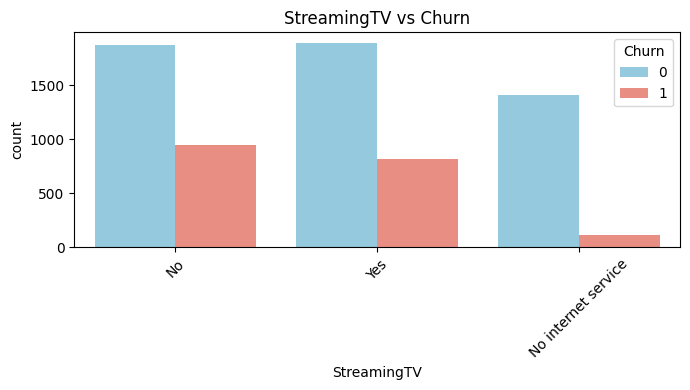

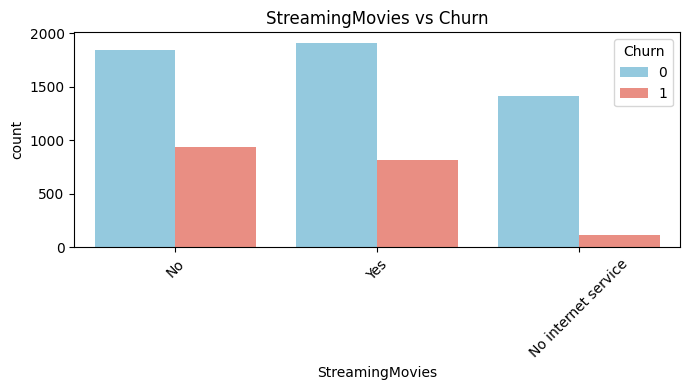

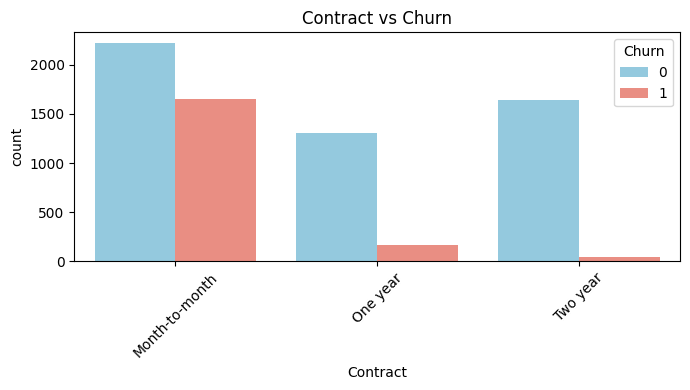

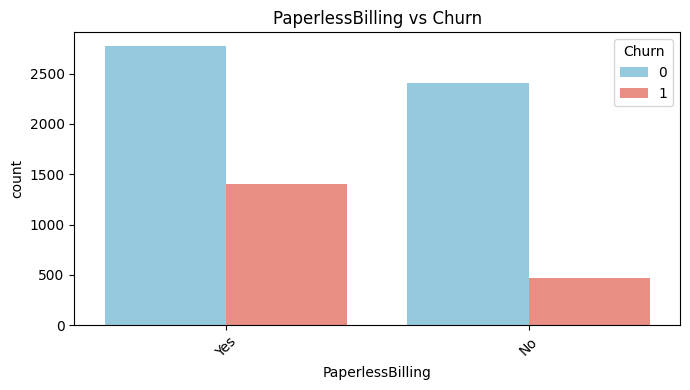

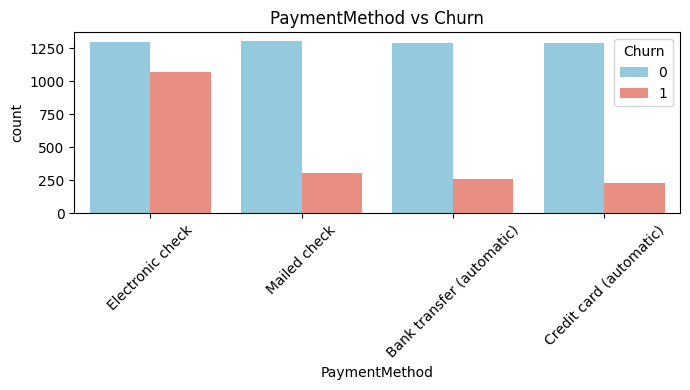

In [996]:
#categorical vs churn
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols
idcolomn = 'customerID' #removing customerid from categorical
if idcolomn in cat_cols:
    cat_cols.remove(idcolomn)


for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df,palette={0:'skyblue',1:'salmon'})
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()
#customer stayed - 0 No

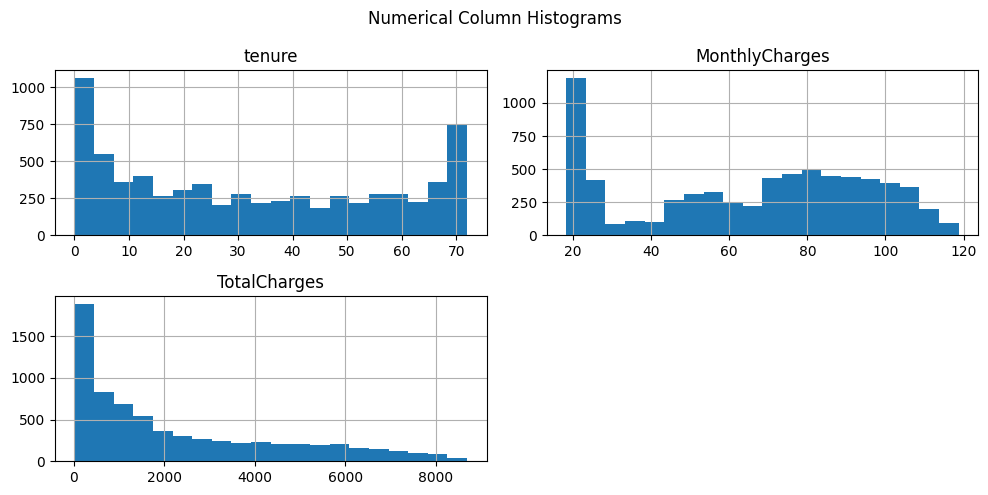

In [997]:
#histograms for numerical colomns
df[num_cols].hist(figsize=(10,5),bins=20)
plt.suptitle('Numerical Column Histograms')
plt.tight_layout()
plt.show()

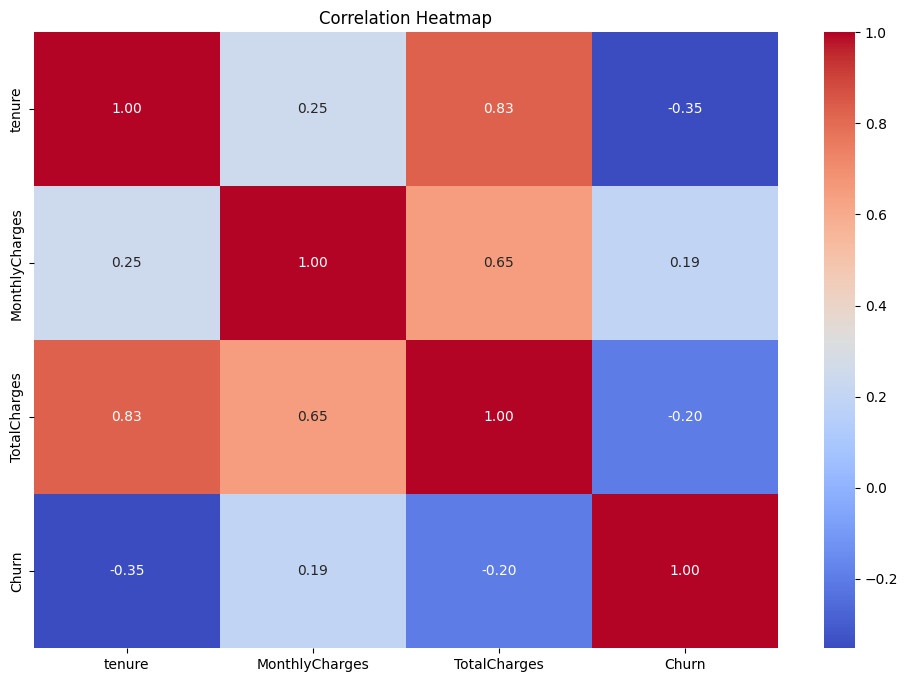

In [998]:
plt.figure(figsize=(12,8))
corr_cols = num_cols + [target]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


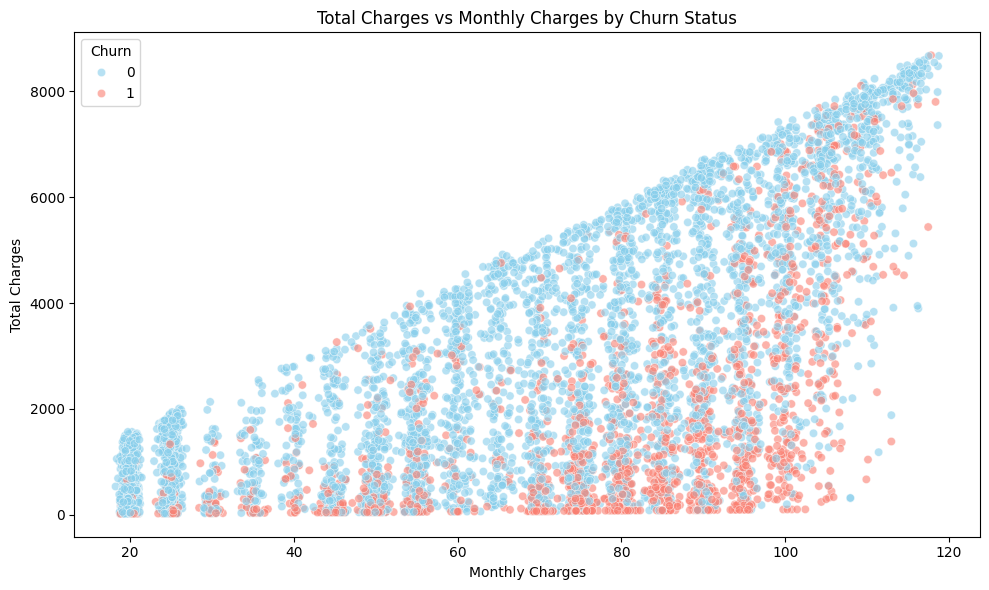

In [999]:
#MonthlyCharges vs TotalCharges

plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='MonthlyCharges',
        y='TotalCharges',
        hue='Churn',
        palette={0:'skyblue',1:'salmon'},
        alpha=0.6
)

plt.title('Total Charges vs Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

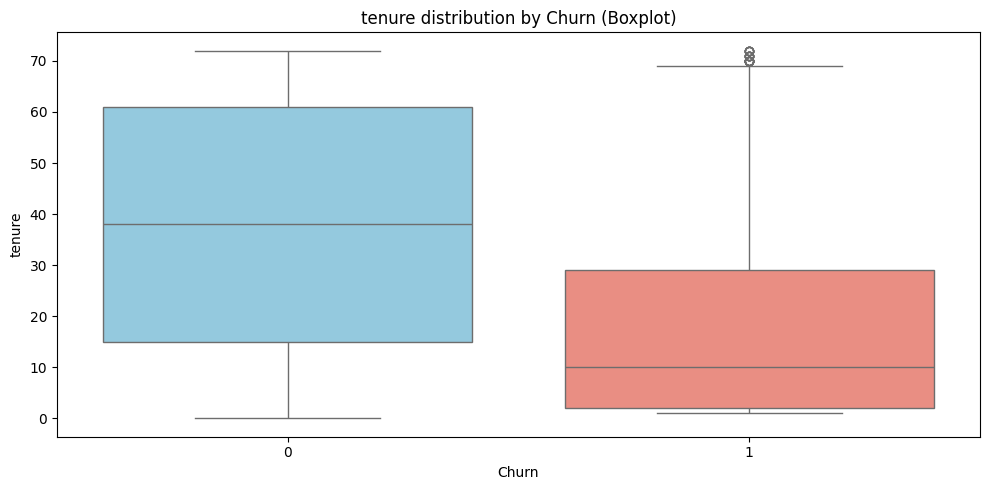

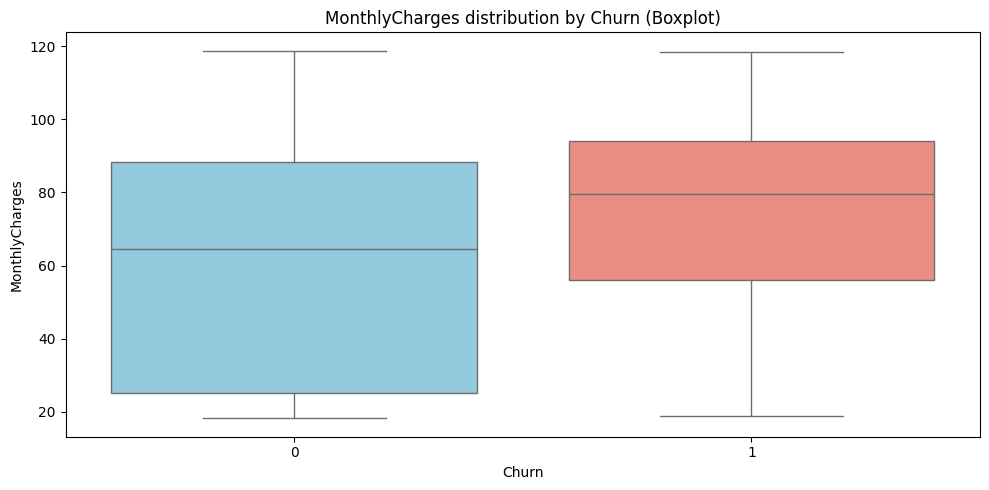

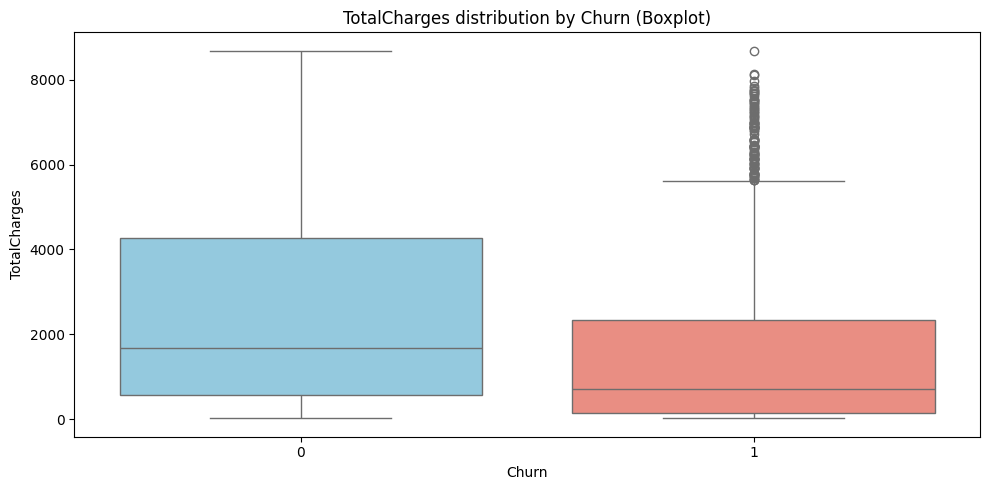

In [1000]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Churn', y=col, data=df,palette={'0':'skyblue','1':'salmon'} )
    plt.title(f'{col} distribution by Churn (Boxplot)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Data Preprocessing

In [1001]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1002]:
# Quick inspection
print(df.head())
print(df.info())
print(df.isnull().sum())


   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessB

In [1003]:
df = df.dropna(subset=['Churn'])  # drop missing just in case target

In [1004]:
#checking for duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [1005]:
#only totalcharges has some missing values but just in case applying to the categorical as well
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [1006]:
#rechecking
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [1007]:
binary_cols = []
multi_cols = []

for col in cat_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multi_cols.append(col)

#LabelEncode binary columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode multi-category columns
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [1008]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Preprocessing complete
Train shape: (5634, 30)
Test shape: (1409, 30)


In [1009]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree model

In [1010]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

In [1011]:
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [1012]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [1013]:
dt_model = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [1014]:
#seeing the training data accuracy first
predictions_train = dt_model.predict(X_train)
accuracy_score(y_train,predictions_train)

0.791089811856585

In [1015]:
y_pred = dt_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.78708303761533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.67      0.39      0.49       374

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



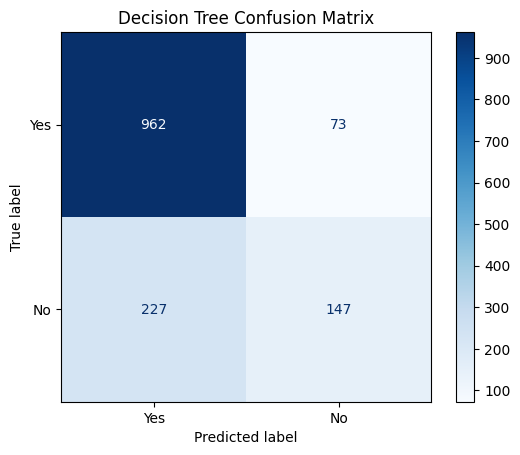

In [1016]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes','No'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

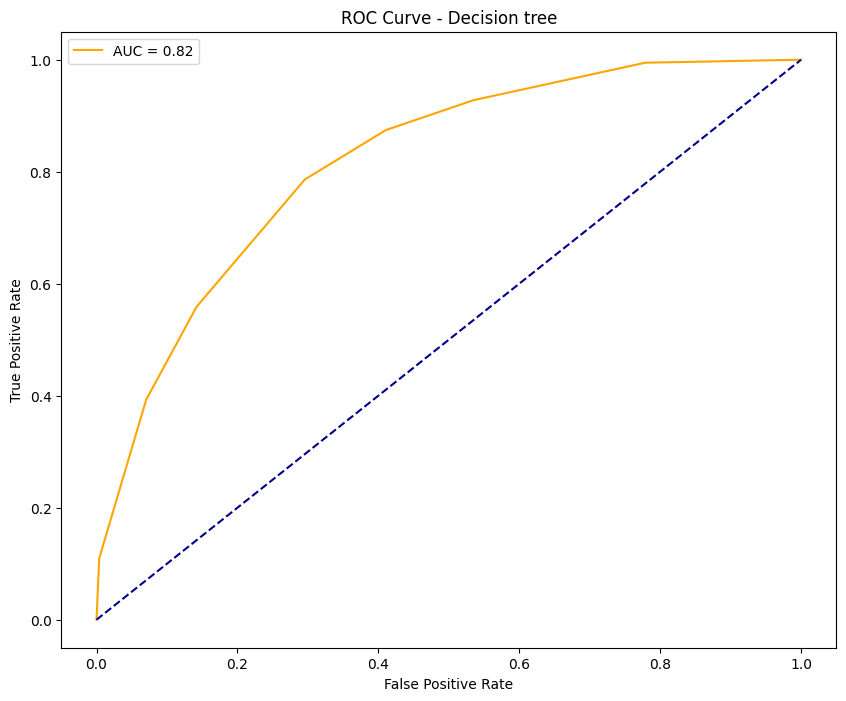

In [1017]:
dt_probs = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_score_dt = roc_auc_score(y_test, dt_probs)

def plot_roc_curve(fpr, tpr, ):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color='orange',label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Decision tree')
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt, )

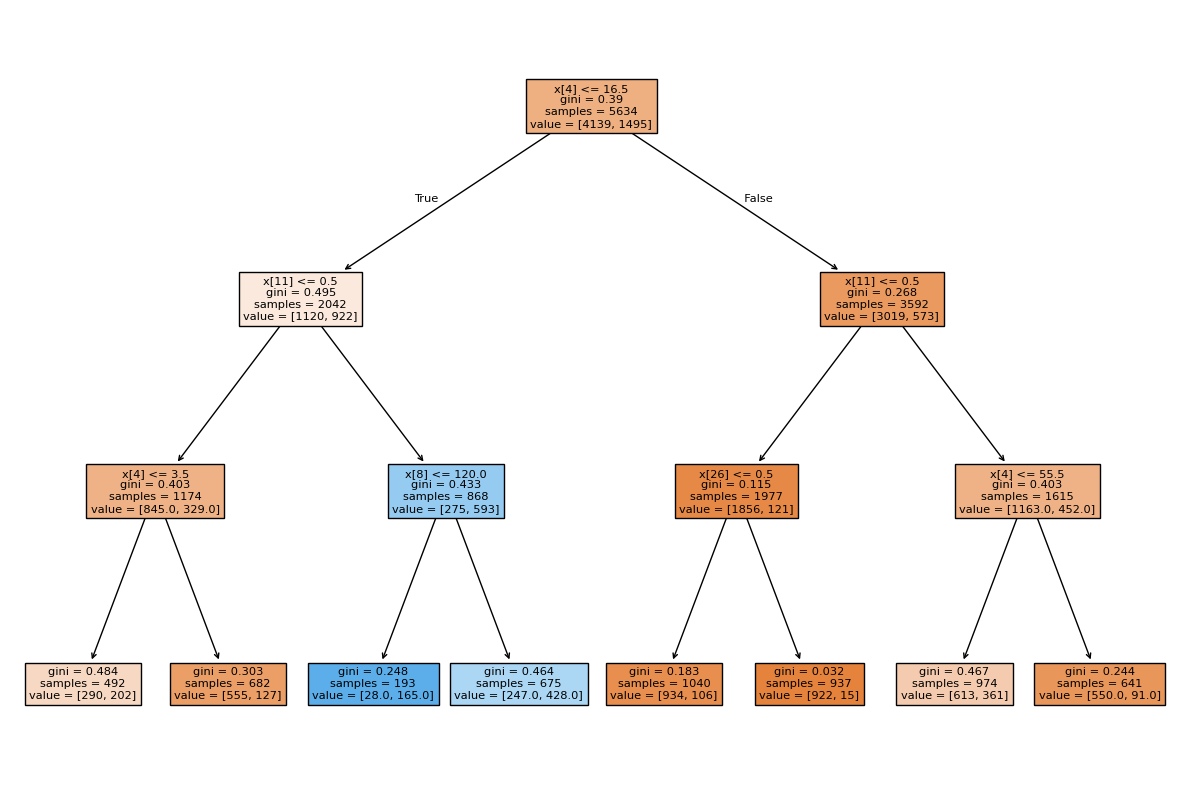

In [1018]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)
plt.show()

Neural Network

In [1019]:
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import kerastuner as kt
import random
from sklearn.metrics import ConfusionMatrixDisplay

In [1020]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [1021]:
def build_model(hp):
    model = Sequential()
    #single layer with tunable neurons
    model.add(Dense(units=hp.Int('units1', min_value=16, max_value=64, step=16),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))

    # Dropout with tunable rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    #compile with tunable learnign rate
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [1022]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='keras_tuner',
    project_name='nn_tuning'
)

Reloading Tuner from keras_tuner/nn_tuning/tuner0.json


In [1023]:
tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_split=0.2,
             verbose=1)

In [1024]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [1025]:
bestmodell = best_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7598 - loss: 0.4872 - val_accuracy: 0.7844 - val_loss: 0.4451
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8013 - loss: 0.4243 - val_accuracy: 0.7862 - val_loss: 0.4466
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8043 - loss: 0.4183 - val_accuracy: 0.7782 - val_loss: 0.4515
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8044 - loss: 0.4204 - val_accuracy: 0.7853 - val_loss: 0.4479
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8006 - loss: 0.4164 - val_accuracy: 0.7853 - val_loss: 0.4480
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8095 - loss: 0.4165 - val_accuracy: 0.7906 - val_loss: 0.4497
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8056 - loss: 0.4182 - val_accuracy: 0.7959 - val_loss: 0.4463
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8067 - loss: 0.4148 - val_accuracy

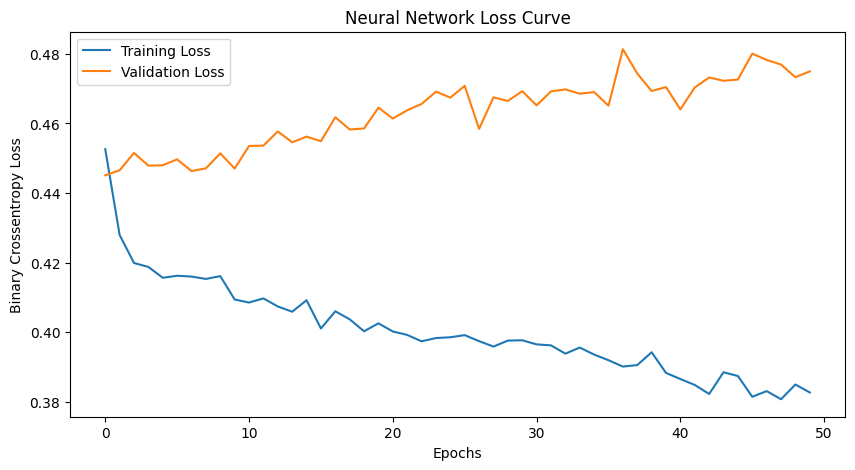

In [1026]:

#loss curve
plt.figure(figsize=(10,5))
plt.plot(bestmodell.history['loss'], label='Training Loss')
plt.plot(bestmodell.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()


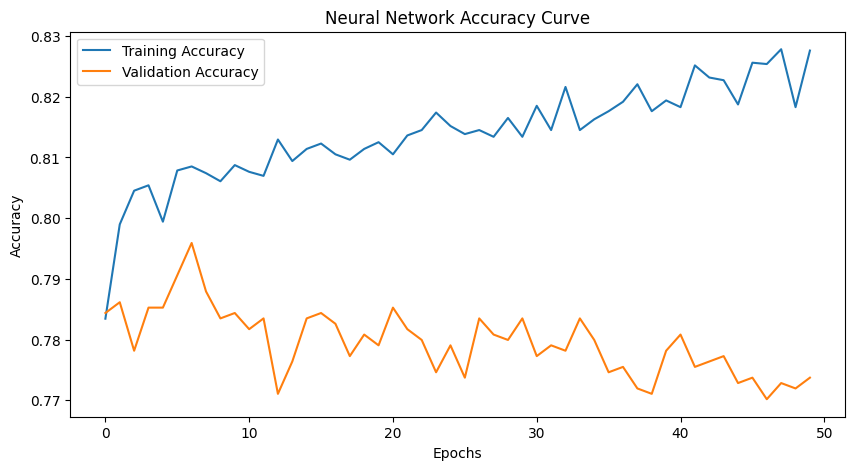

In [1027]:
#accuracy curve
plt.figure(figsize=(10,5))
plt.plot(bestmodell.history['accuracy'], label='Training Accuracy')
plt.plot(bestmodell.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1028]:
y_pred_tf = (best_model.predict(X_test_scaled).ravel() > 0.5).astype(int)
acc_tf = accuracy_score(y_test, y_pred_tf)
print(f"TensorFlow NN Accuracy (Best Model): {acc_tf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tf))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
TensorFlow NN Accuracy (Best Model): 0.7857

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.62      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



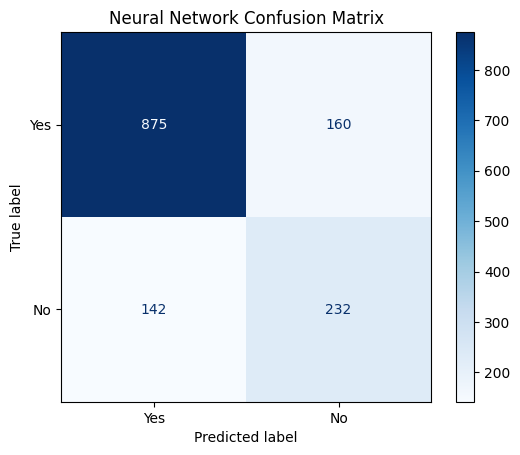

In [1029]:
cmt=confusion_matrix(y_test, y_pred_tf)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=['Yes','No'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Neural Network Confusion Matrix")
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


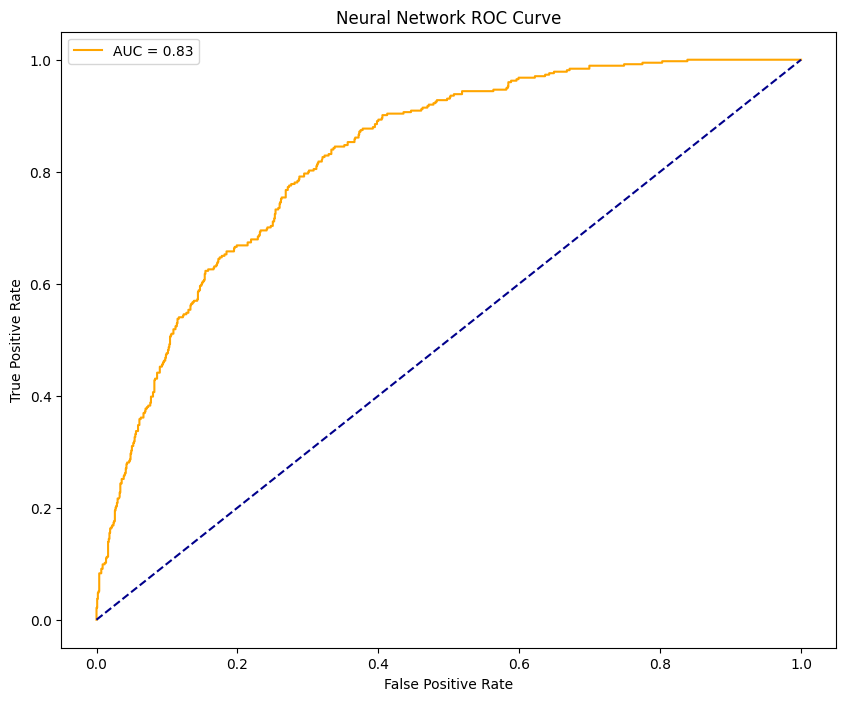

In [1030]:
nn_probs = best_model.predict(X_test_scaled).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn_probs)
auc_score_nn = roc_auc_score(y_test, nn_probs)

def plot_roc_curve(fpr, tpr, auc_score, title):
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc_score)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

plot_roc_curve(fpr_nn, tpr_nn, auc_score_nn, 'Neural Network ROC Curve')

======== FINAL COMPARISON ========
      Metric  Decision Tree  Neural Network
0   Accuracy       0.787083        0.785664
1  Precision       0.668182        0.591837
2     Recall       0.393048        0.620321
3   F1-score       0.494949        0.605744
4    ROC AUC       0.816766        0.827275


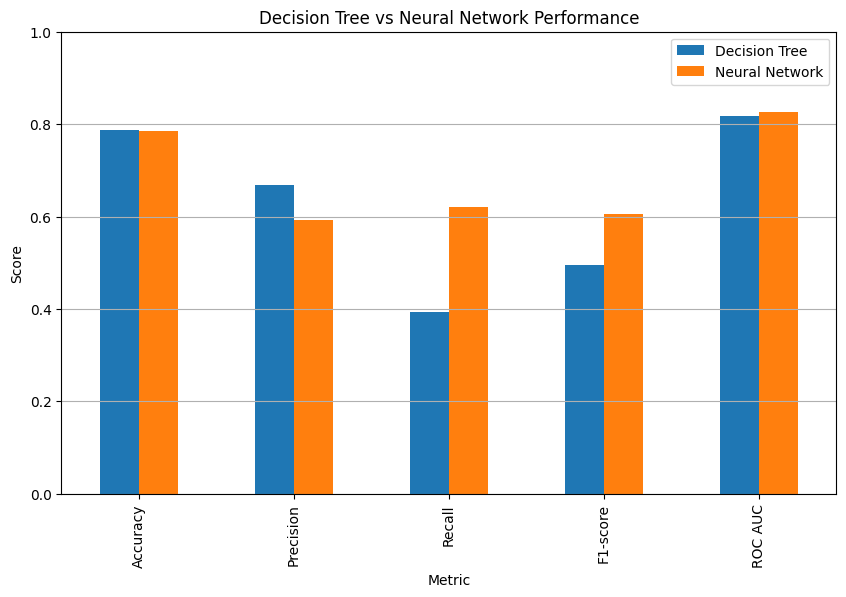

In [1031]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_dt = accuracy_score(y_test, y_pred)
prec_dt = precision_score(y_test, y_pred)
rec_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
auc_dt = roc_auc_score(y_test, dt_probs)


acc_nn = accuracy_score(y_test, y_pred_tf)
prec_nn = precision_score(y_test, y_pred_tf)
rec_nn = recall_score(y_test, y_pred_tf)
f1_nn = f1_score(y_test, y_pred_tf)
auc_nn = roc_auc_score(y_test, nn_probs)


comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"],
    "Decision Tree": [acc_dt, prec_dt, rec_dt, f1_dt, auc_dt],
    "Neural Network": [acc_nn, prec_nn, rec_nn, f1_nn, auc_nn]
})

print("======== FINAL COMPARISON ========")
print(comparison_df)


comparison_df.set_index("Metric").plot(kind="bar", figsize=(10,6))
plt.title("Decision Tree vs Neural Network Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()